# Microsoft SQL Server
Microsoft SQL Server is a relational database management system developed by Microsoft. As a database server, it is a software product with the primary function of storing and retrieving data as requested by other software applications.

In [92]:
import pyodbc 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import os
import pandas_profiling as pp

### This is the path where the document(s) can be found.

In [93]:
cwd = os.getcwd()
#cwd
#'C:\\Users\\joel1'

### Here we can make sure that the all rows and columns are displayed. 

In [94]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Establishing connection

In [95]:
Driver= 'SQL Server'  ## This is the type of database engine
Server= 'DESKTOP-5UQEVT5\SQLEXPRESS'   ##id info
Database='mydatabase'            ##Database name
Trusted_Connection='yes'

conn = pyodbc.connect(f"""Driver={Driver};
                      Server={Server};
                      Database={Database};
                      Trusted_Connection={Trusted_Connection};""")

cursor = conn.cursor()
print("Connection established!")

Connection established!


### insert your query inside the query space

In [96]:

query =f"""


select --top 2
color,COUNT(Color) as amount 
from   [dbo].[Product]
where Color != ''
group by color



"""
df = pd.read_sql(query, conn)

display(df)

,color,amount
0,Black,93
1,Blue,26
2,Grey,1
3,Multi,8
4,Red,38
5,Silver,43
6,Silver/Black,7
7,White,4
8,Yellow,36


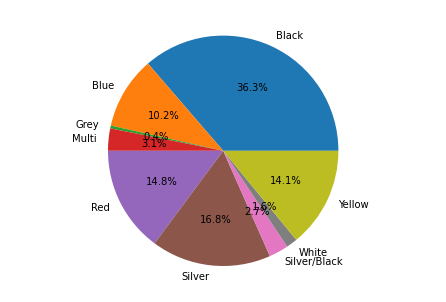

In [97]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0.5,0,1,1])
ax.axis('equal')
labels = df["color"]
sizes = df["amount"]
ax.pie(sizes, labels = labels,autopct='%1.1f%%')
plt.show()

### This function will populate some brief but powerful statistical data.

In [98]:

df.describe()


,amount
count,9.000000
mean,28.444444
std,29.073661
min,1.000000
25%,7.000000
50%,26.000000
75%,38.000000
max,93.000000


### Convert your results into a Json file

In [99]:
### table, records,split,index,columns,values
print(df.to_json(orient ='table'))

{"schema":{"fields":[{"name":"index","type":"integer"},{"name":"color","type":"string"},{"name":"amount","type":"integer"}],"primaryKey":["index"],"pandas_version":"0.20.0"},"data":[{"index":0,"color":"Black","amount":93},{"index":1,"color":"Blue","amount":26},{"index":2,"color":"Grey","amount":1},{"index":3,"color":"Multi","amount":8},{"index":4,"color":"Red","amount":38},{"index":5,"color":"Silver","amount":43},{"index":6,"color":"Silver\/Black","amount":7},{"index":7,"color":"White","amount":4},{"index":8,"color":"Yellow","amount":36}]}


### Save your results into a Json file

In [100]:
df.to_json (r'C:\\Users\\joel1\\test.json')
df.to_csv('test.csv')

### Prepare an extensive profile of your data

In [101]:
#profile = pp.ProfileReport(df)
#profile.to_file("output1.html")

# Make sure you close your connection.

If we don't close the connection, it will lead to connection memory leakage. Unless/until application server/web server is shut down, connection will remain activate even though the user logs out.

There are additional reasons. Suppose database server has 10 connections available and 10 clients request for the connection. If the database sever grants all of them, and after their usage they are not closed, the database server would not be able to provide a connections for another request. For that reason we need to close them - it is mandatory.

Furthermore, it might lead to some mischievous activities regarding the integrity of the database.
<a id='https://stackoverflow.com/questions/25864235/why-we-should-close-the-connection-in-jdbc-if-we-dont-do-it-what-will-happen'></a>
https://stackoverflow.com/questions/25864235/why-we-should-close-the-connection-in-jdbc-if-we-dont-do-it-what-will-happen

In [102]:
csr = conn.cursor()  
csr.close()
conn.close()     #<--- Close the connection
print("Connection has been closed!!")

Connection has been closed!!
